In [1]:
import tensorflow
from tensorflow import keras
import numpy as np

import seaborn as sns
sns.set()

# Importantando Base de Dados
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

2022-12-17 19:37:17.502903: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 19:37:18.419559: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-17 19:37:18.419604: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-17 19:37:18.419609: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
# Verificando identificações das imagens
imagens_treino.shape, identificacoes_treino.shape

((60000, 28, 28), (60000,))

### **Visualizando Imagens**

In [3]:
import matplotlib.pyplot as plt

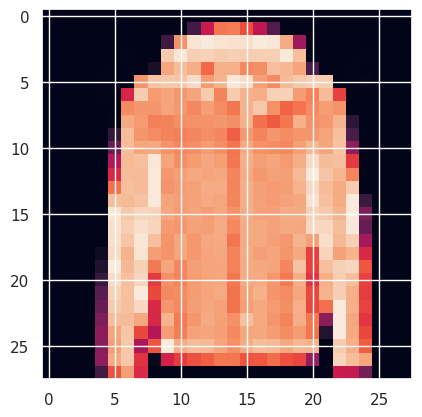

In [4]:
plt.imshow(imagens_treino[5000]);

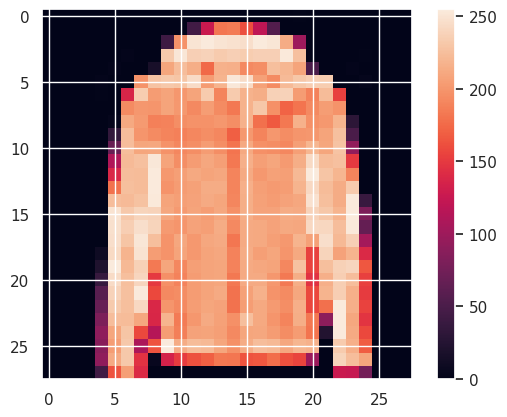

In [5]:
# Verificando cores das imagens
plt.imshow(imagens_treino[5000])
plt.colorbar();

# Pelo Color Bar consigo ver que a variação das cores vai de 0 a 250

In [6]:
# Veriricando imagens
identificacoes_treino.min()
identificacoes_treino.max()
nomes_de_classificacoes= ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tenis', 'Bolsa', 'Bota']


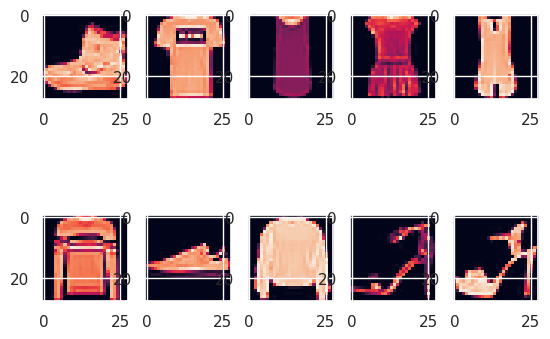

In [7]:
for imagem in range(10):
    plt.subplot(2,5, imagem +1 )
    plt.imshow(imagens_treino[imagem])

### **Criando o Modelo - Rede Neural**

In [8]:
# Com este processo estou normalizando a escala de valores 
imagens_treino = imagens_treino / 255.0

modelo = keras.Sequential([
    # Redimensionando o Array para que ele fique com apenas uma dimensão
    keras.layers.Flatten(input_shape = (28,28)),
    
    # Criando a camada 1 de Processamento
    keras.layers.Dense(256, activation=tensorflow.nn.relu),

    # Camada de Dropout
    keras.layers.Dropout(0.2),

    # Criando Camada de saída
    keras.layers.Dense(10, activation= tensorflow.nn.softmax)
])

modelo.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', 
                metrics= ['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs= 5, validation_split= 0.20)

2022-12-17 19:37:22.019454: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-12-17 19:37:22.019496: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: span
2022-12-17 19:37:22.019501: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: span
2022-12-17 19:37:22.019685: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.86.1
2022-12-17 19:37:22.019730: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-12-17 19:37:22.019734: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.65.1 does not match DSO version 515.86.1 -- cannot find working devices in this configuration
2022-12-17 19:37:22.020076

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5250 - accuracy: 0.8138 - val_loss: 0.4242 - val_accuracy: 0.8478
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3977 - accuracy: 0.8560 - val_loss: 0.4000 - val_accuracy: 0.8545
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3620 - accuracy: 0.8663 - val_loss: 0.3551 - val_accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3414 - accuracy: 0.8750 - val_loss: 0.3459 - val_accuracy: 0.8753
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3237 - accuracy: 0.8809 - val_loss: 0.3345 - val_accuracy: 0.8789


In [9]:
# Posso acessar estes parametros de forma individual e tambem gerar diferentes visualizações e métricas
historico.history

{'loss': [0.5250427722930908,
  0.39766743779182434,
  0.3620067238807678,
  0.341358482837677,
  0.32365232706069946],
 'accuracy': [0.8137916922569275,
  0.856041669845581,
  0.8663333058357239,
  0.8749791383743286,
  0.8809166550636292],
 'val_loss': [0.4242058992385864,
  0.39996349811553955,
  0.3550727665424347,
  0.34591126441955566,
  0.3345426023006439],
 'val_accuracy': [0.8478333353996277,
  0.8544999957084656,
  0.8727499842643738,
  0.875333309173584,
  0.8789166808128357]}

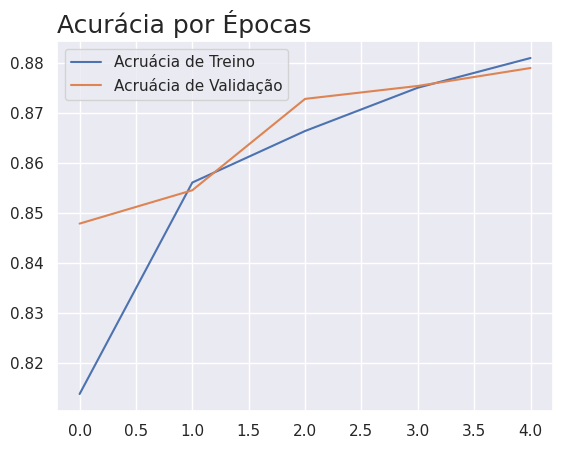

In [10]:
plt.plot(historico.history['accuracy'], label = 'Acruácia de Treino')
plt.plot(historico.history['val_accuracy'], label= 'Acruácia de Validação')
plt.title('Acurácia por Épocas', fontsize= 18, loc= 'left')
plt.legend();

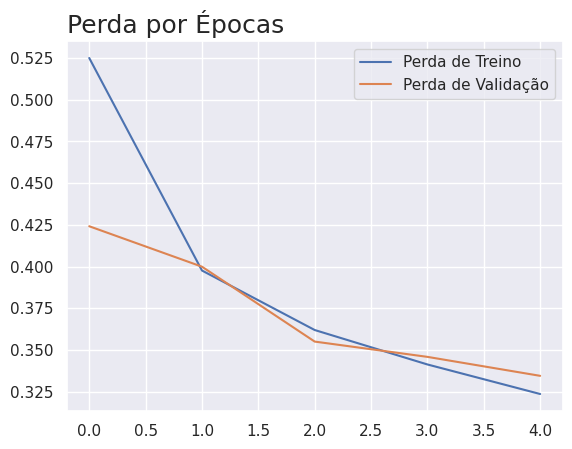

In [11]:
plt.plot(historico.history['loss'], label = 'Perda de Treino')
plt.plot(historico.history['val_loss'], label= 'Perda de Validação')
plt.title('Perda por Épocas', fontsize= 18, loc= 'left')
plt.legend();

### **Avaliando Performance do Modelo**

In [12]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

print(f'Perdad do Teste {perda_teste}')
print(f'Acurácia do teste {acuracia_teste}')

313/313 [==============================] - 1s 1ms/step - loss: 52.3723 - accuracy: 0.8569
Perdad do Teste 52.37225341796875
Acurácia do teste 0.8568999767303467


### **Salvando o Modelo**

In [13]:
modelo.save('modelo.h5')

### **Fazendo Load do Modelo**

In [14]:
from tensorflow.keras.models import load_model
modelo_salvo = load_model('modelo.h5')